/home/jr13114/.conda/envs/acrg/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


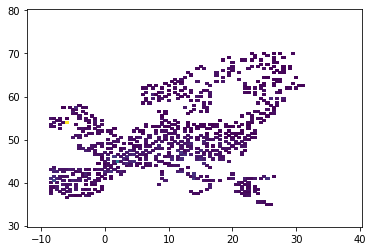

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import xarray as xr
topsoil = pd.read_csv('/home/jr13114/Documents/rn_flux/U_topsoil.csv')

#get output grid:
output_lat = np.arange(30, 80.5, 0.5)
output_lon = np.arange(-12, 40.5, 0.5)
#convert to cell edges from cell centres [ converting from x to | if grids are: |x|x|x| ]
output_lat_edges = np.append(output_lat, output_lat[-1]+0.5) - 0.25
output_lon_edges = np.append(output_lon, output_lon[-1]+0.5) - 0.25

#bin points into the output grid
output, X, Y, N = scipy.stats.binned_statistic_2d(topsoil["LONG"], topsoil["LAT"], topsoil["U"], 
                                                  statistic="mean", bins=[output_lon_edges, output_lat_edges])

#plot output
fig, ax = plt.subplots()
ax.pcolormesh(X, Y, output.T)

In [16]:
out = xr.Dataset( {"values": (["lat", "lon"],output.T)},
                   coords={'lat':(['lat'], output_lat),
                           'lon':(['lon'], output_lon)})

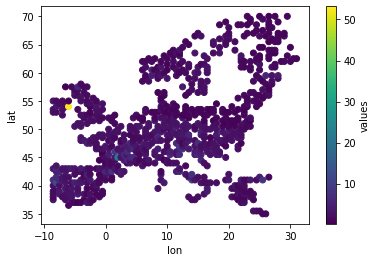

In [18]:
out.plot.scatter('lon','lat','values')

In [62]:
u_map = out.to_dataframe()
u_map = u_map.reset_index() #un-melting the dataframe
u_map = u_map.pivot(index = 'lat', columns = 'lon')['values']
u_map = u_map.reset_index()

del u_map['lat'] #removes 'lat' column
u_map.columns = range(u_map.shape[1]) # column index rather than column headings

u_map = u_map.to_numpy() #turn df into numpy array

In [60]:
df = pd.read_csv('/home/jr13114/Documents/rn_flux/glim_wgs84_0point5deg.txt.asc',
                skiprows =6,na_values=-9999, delim_whitespace=True, engine='python',names=range(720))

df.columns = np.arange(-180,180,0.5)
df.index = np.arange(89.5,-90.5,-0.5)
df = df.iloc[19:120] #truncating global map to span Europe 
df = df.loc[:,-12:40]
df = df.reset_index()

del df['index']
df.columns = range(df.shape[1])
class_map = df.to_numpy()

In [67]:
average_values = {} #dict containing median U conc values for each lithology class

for Class in np.arange(1,17):
    indicies = np.where(class_map == Class)[0] 
    average_values[str(Class)] = np.nanmedian(u_map[indicies])

/home/jr13114/.conda/envs/acrg/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
